In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

# 1.) Import an asset price from Yahoo Finance

In [24]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


########################################
####Pick your ticker and time period####
########################################
stock_data = yf.download("MSFT", start="1990-01-01", end="2022-02-21")

#use whatever you're interested in

# Preprocess data
scaled_data = np.array(stock_data["Close"].pct_change().dropna()).reshape(-1,1)


# Split data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]



[*********************100%***********************]  1 of 1 completed


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [26]:
x_train = []
y_train = []


#############################################################
####Pick your input size and edit to make binary forecast####
#############################################################
input_size =  3 # the number of timelag, 1: use today's data to predict tomorrow's data; 
for i in range(input_size, len(train_data)):
    x_train.append(train_data[i-input_size:i, 0])
    y_train.append(1 if train_data[i, 0] > 0 else 0)


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###################################
####Build Your RNN Architecture####
###################################
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
6474/6474 [==============================] - 36s 4ms/step - loss: 0.2554
Epoch 2/3
6474/6474 [==============================] - 28s 4ms/step - loss: 0.2524
Epoch 3/3
6474/6474 [==============================] - 28s 4ms/step - loss: 0.2516


# 3.) Test your model and compare in sample Accurracy, in sample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [46]:

test_data = scaled_data[training_data_len - input_size:, :]

x_test = []
y_test = []


for i in range(input_size, len(test_data)):
    x_test.append(test_data[i-input_size:i, 0])
    y_test.append(1 if test_data[i, 0] > 0 else 0)


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))




predictions = model.predict(x_test)
predictions = predictions [:,0]
predictions_in = model.predict(x_train)
predictions_in = predictions_in [:,0]

# IN Random walk Model
y_train[1:] # Actual
y_train[:-1] # Prediction

# OOS Random walk Model
y_test[1:] # Actual
y_test[:-1] # Prediction

203/203 [==============================] - 1s 3ms/step


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


In [33]:
predictions = np.where(predictions >0.5, 1, 0)
predictions_in = np.where(predictions_in >0.5, 1, 0)

In [34]:
rw_train = []
rw_test = []
rd = [0,1]
for i in range(len(predictions_in)):
  rw_train.append(random.choice(rd))
for i in range(len(predictions)):
  rw_test.append(random.choice(rd))

In [42]:
# In-sample Accuracy
In_sample_accuracy = accuracy_score(y_train, predictions_in )
print('In-sample accuracy:', accuracy_score(y_train, predictions_in ))

# In-sample Random Walk Accuracy
In_sample_Random_Wal_accuracy = accuracy_score(y_train, rw_train)
print('In-sample Random Walk accuracy:', accuracy_score(y_train, rw_train))

# Out-of-sample Accuracy
Out_of_sample_accuracy = accuracy_score(y_test, predictions)
print('Out-of-sample accuracy:', accuracy_score(y_test, predictions))

# Out-of-sample Random Walk Accuracy
Out_of_sample_Random_Wal_accuracy = accuracy_score(y_test, rw_test)
print('In-sample Random Walk accuracy:', accuracy_score(y_test, rw_test))

In-sample accuracy: 0.5047883843064566
In-sample Random Walk accuracy: 0.5040160642570282
Out-of-sample accuracy: 0.45308641975308644
In-sample Random Walk accuracy: 0.5018518518518519


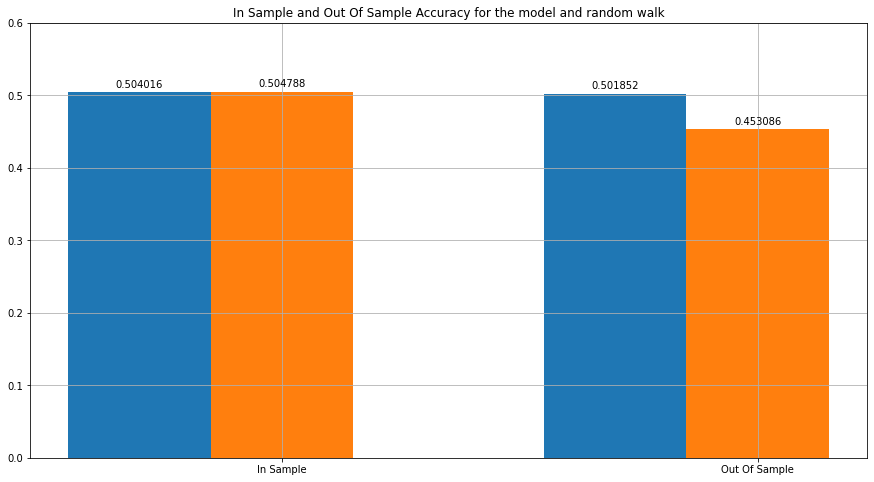

In [47]:
species = ("In Sample", "Out Of Sample")
penguin_means = {
    'Random Walk Accuracy': (In_sample_Random_Wal_accuracy,Out_of_sample_Random_Wal_accuracy),
    'Model Accuracy': (In_sample_accuracy, Out_of_sample_accuracy)
}

x = np.arange(len(species))
width = 0.3
multiplier = 0

fig, ax = plt.subplots(figsize = (15,8))

for attribute, measurement in penguin_means.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, measurement, width, label = attribute)
  ax.bar_label (rects, padding = 3)
  multiplier += 1

ax.set_label('Accuracy')
ax.set_title('In Sample and Out Of Sample Accuracy for the model and random walk')
ax.set_xticks(x + width, species)
ax.legend 
ax.set_ylim(0,0.60)
plt.grid()
plt.show()

# 4.) Plot in and out of sample accuracy

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on full dataset

test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

train_predict = model.predict(x_train)
train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)



plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
end_val = np.cumprod(y_train+1)[-1]
test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

#5.) Write an observation/conclusion about the graphs from Q4 and Q3

## According to the bar chart from Question3, we have that the scores of accuracy of in sample model and in sample random walk model are relatively the same, both of which are higher than the scores of accuracy of the out of sample model and out of sample random walk model. 
## Among 4 models, in sample model performs the best, which has the highest score of accuracy. 

# 6.) Create a parameter for number of lags in your input layer. Do a 3-fold CV to test three different time lags. i.e. Tested using 5,10,20 days of previous price data to forecast

In [ ]:
#We only need to test three models: 5, 10, 20 days. 

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Define the Keras model
###Edit here to create your optimizer
def create_model(): 
    model = Sequential()
    model.add(Dense(10, input_dim=60, activation='LSTM'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
####EXAMPLE###
#param_grid = {'batch_size': [10, 20, 100],
#              'epochs': [10, 100], # value of epochs can be changed 
#              'neurons':[5,10,20]}

# Perform the grid search over the hyperparameters

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-55-f5508c983bfa>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.000000 using {'batch_size': 10, 'epochs': 10}
